In [1]:
from src.networks import MLP
from src.eig import EigenValueComputer
from torchvision.datasets import CIFAR10
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, Subset
import torch.nn as nn
from torch.optim import SGD
from tqdm import tqdm
from pyhessian import hessian
import matplotlib.pyplot as plt

In [2]:
device = "cpu"

In [3]:
cifar10 = CIFAR10("data/", download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
cifar10_sub = Subset(cifar10, [i for i in range(256)])
cifar10_loader = DataLoader(cifar10_sub, batch_size=256, shuffle=False)

In [4]:
print(cifar10_sub)

In [5]:
mlp = MLP((3, 32, 32), 10).to(device)

In [6]:
n_epochs = 1000
lr = 2/150
loss_fn = nn.CrossEntropyLoss()

In [77]:
hessian_comp = hessian(mlp, loss_fn, dataloader=cifar10_loader, cuda=True if device=="cuda" else False)

In [7]:
hessian_comp = EigenValueComputer(mlp, loss_fn, next(iter(cifar10_loader)))

In [9]:
optimizer = SGD(mlp.parameters(), lr=lr)

eigenvalues = []

for epoch in range(n_epochs):
    print(f"=================== EPOCH {epoch} ===================")
    avg_loss = 0
    n = 0
    for i, (img, labels) in enumerate(cifar10_loader):
        optimizer.zero_grad()

        pred = mlp(img.to(device))
        loss = loss_fn(pred, labels.to(device))

        avg_loss += loss.item()
        n += 1

        loss.backward()
        optimizer.step()

    evs = hessian_comp.step(loss)
    #eigenvalues.append(_eigenvalues[0])

    print(f"New Computed Eigenvalues: {evs}")
        
    print(f"Loss: {avg_loss/n}")

=================== EPOCH 0 ===================


RuntimeError: grad can be implicitly created only for scalar outputs

In [ ]:
print(hessian_comp.eigenvalue_history)

[2.2952914237976074, 2.3986449241638184, 2.5085768699645996, 2.607016086578369, 2.7189340591430664, 2.830270528793335, 2.9365806579589844, 3.0508482456207275, 3.166992664337158, 3.2925219535827637]


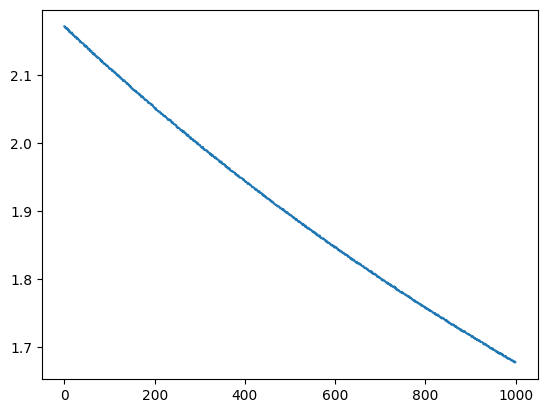

In [74]:
plt.plot(eigenvalues)